In [2]:
from fastbook import *

# Review

## Training Framework

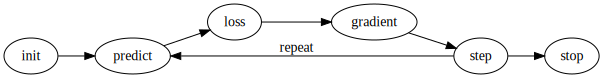

In [3]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## Core

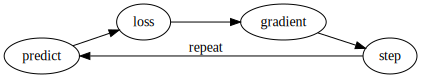

In [5]:
gv('''
predict->loss->gradient->step
step->predict[label=repeat]
''')

## Code Concept (one-line for each, with _DataLoader_)

```python
for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```

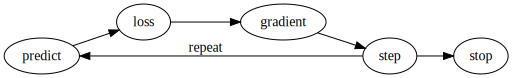

In [6]:
gv('''
predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## Actual Implementation

```python
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()
```

```python
for i in range(20):
    train_epoch(model, lr, params)
    validate_epoch()
```

## Basic NN with one activation function

```python
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

def model(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res 
```

In [ ]:
# Using torch.nn
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(), 
    nn.Linear(30, 1)
)

### A More Complicated Model

### fastai Learner class

```python
learn = Learner(dls, model, loss_func=, metrics=, opt_func=)
```

## More on Cross-Entropy

In [11]:
t = torch.tensor([1,2,3,5.]); t

tensor([1., 2., 3., 5.])

In [13]:
t.softmax(0)

tensor([0.0152, 0.0414, 0.1125, 0.8310])